In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import data
df = pd.read_csv("data/medical_examination.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# Add 'overweight' column
df["overweight"] = (df["weight"] / ((df["height"] / 100)**2)) > 25
df["overweight"] = df["overweight"].replace({True: 1, False: 0})

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, 
#make the value 0. If the value is more than 1, make the value 1.
df[["cholesterol", "gluc"]] = df[["cholesterol", "gluc"]].replace({1: 0, 2: 1, 3: 1})

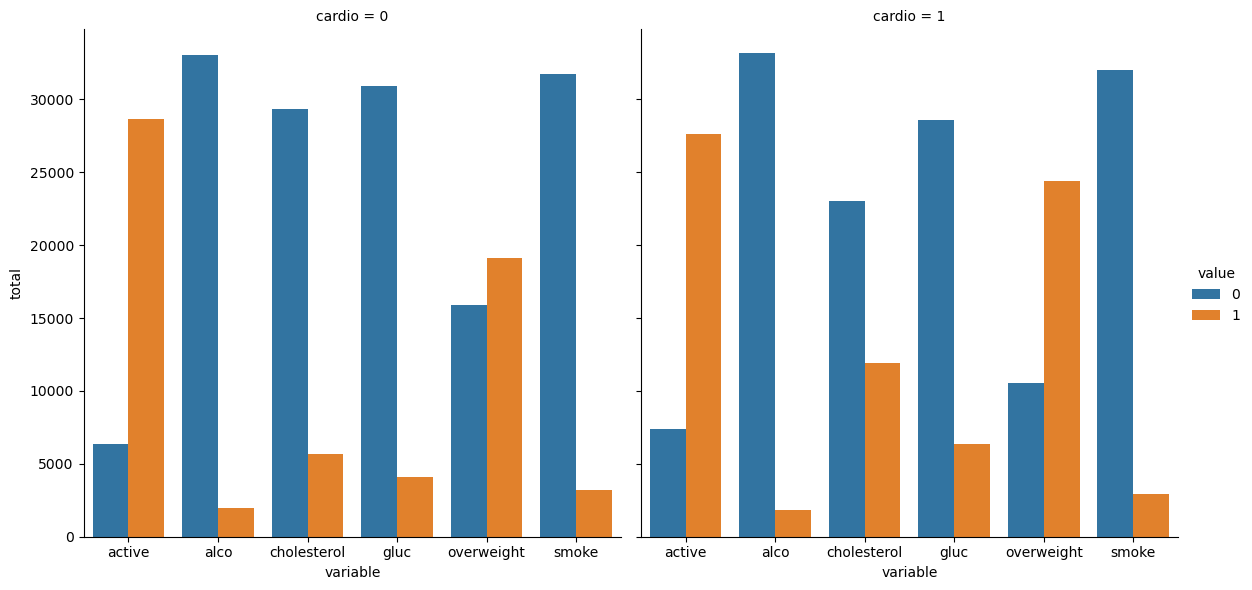

In [4]:
# Create DataFrame for cat plot using `pd.melt` using just the values 
#from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars="cardio", value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])

# Group and reformat the data to split it by 'cardio'. Show the counts of each feature.
df_cat = df_cat.groupby(["cardio", "variable", "value"]).size().to_frame("total")
df_cat = df_cat.reset_index()
    
# Draw the catplot
sns.catplot(data=df_cat, x="variable", y="total", hue="value", col="cardio", kind="bar", height=6)

<AxesSubplot:>

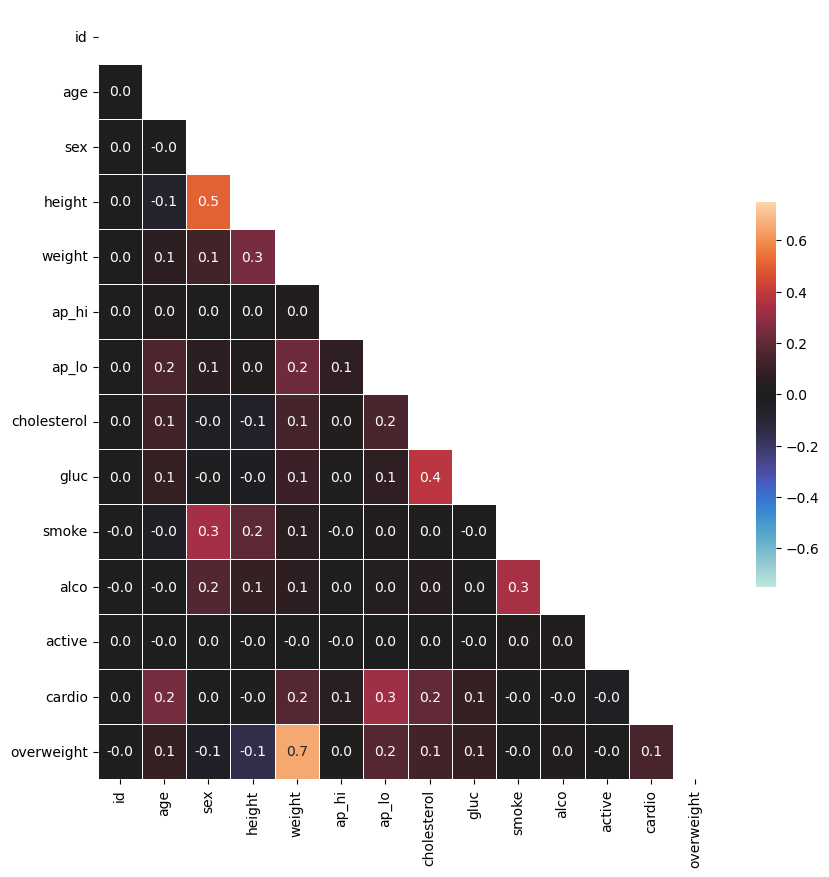

In [5]:
# Clean the data
df_heat = df[
    (df["ap_lo"] <= df["ap_hi"]) & 
    (df["height"] >= df["height"].quantile(0.025)) & 
    (df["height"] <= df["height"].quantile(0.975)) & 
    (df["weight"] >= df["weight"].quantile(0.025)) & 
    (df["weight"] <= df["weight"].quantile(0.975))
]

# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.tick_params(axis='x', labelrotation=90)

# Draw the heatmap
sns.heatmap(corr, mask=mask, vmin=-0.75, vmax=0.75, center=0, annot=True, 
            fmt="0.1f", linewidth=0.5, cbar_kws={"shrink": 0.5}, ax=ax)